In [8]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

In [6]:
dta= pd.read_csv("US-GDPC1.csv")
dta.index = sm.tsa.datetools.dates_from_range('1947Q1', "2016Q4")
del dta["DATE"]

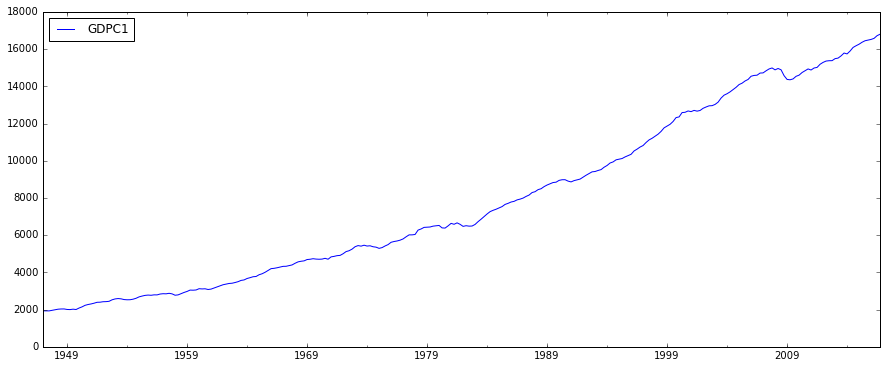

In [10]:
dta.plot(figsize=(15, 6))
plt.show()

C:\Users\holab\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


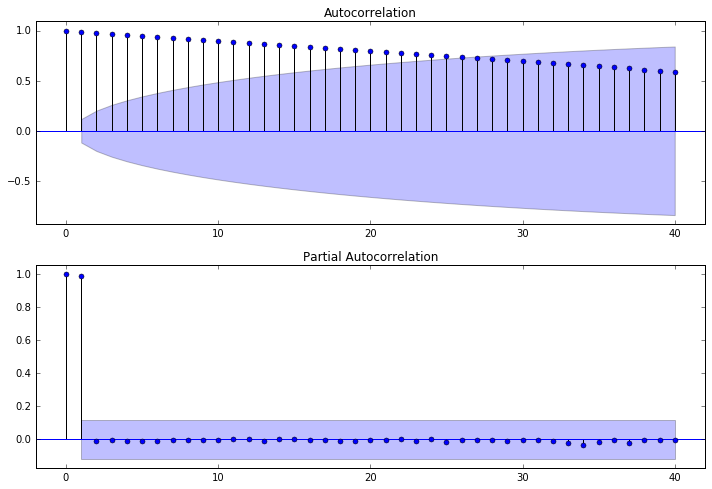

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
fig.show()

In [18]:
adftest = adfuller(dta.values.ravel(),autolag ="AIC")
adfresult = pd.Series(adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in adftest[4].items():
              adfresult['Critical Value (%s)'%key] = value
print(adfresult)

Test Statistic                   2.317085
p-value                          0.998966
#Lags Used                       2.000000
Number of Observations Used    277.000000
Critical Value (5%)             -2.872031
Critical Value (1%)             -3.454180
Critical Value (10%)            -2.572360
dtype: float64


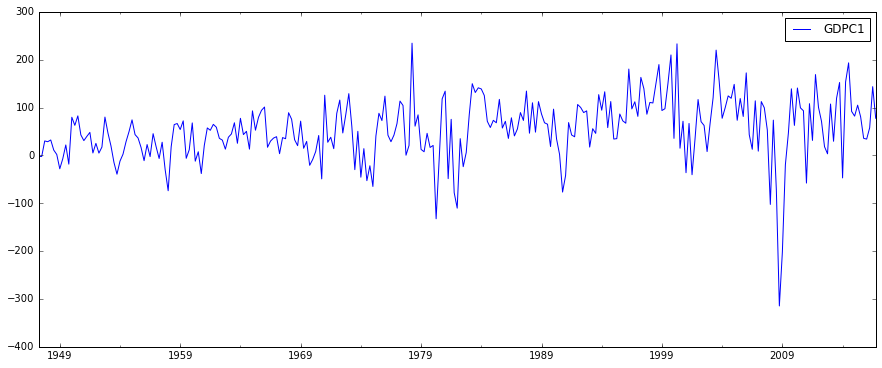

In [29]:
diff_s = (dta.values - dta.shift(1))
diff_s = diff_s.dropna(axis=0)
diff_s.plot(figsize=(15, 6))
plt.show()

C:\Users\holab\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


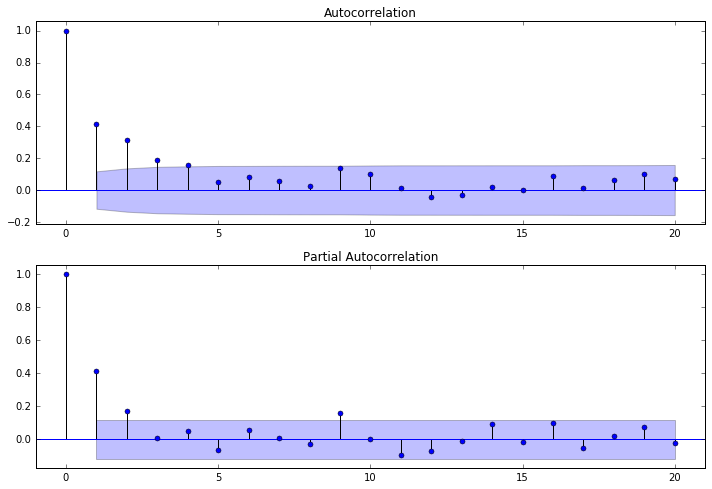

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff_s.squeeze(), lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff_s.squeeze(), lags=20, ax=ax2)
fig.show()

In [21]:
adftest = adfuller(diff_s.values.ravel(),autolag ="AIC")
adfresult = pd.Series(adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in adftest[4].items():
              adfresult['Critical Value (%s)'%key] = value
print(adfresult)

Test Statistic                -7.530786e+00
p-value                        3.583284e-11
#Lags Used                     1.000000e+00
Number of Observations Used    2.770000e+02
Critical Value (5%)           -2.872031e+00
Critical Value (1%)           -3.454180e+00
Critical Value (10%)          -2.572360e+00
dtype: float64


Now, we have a much better result with relatively low p-value and AIC

In [22]:
arma_mod20 = sm.tsa.ARIMA(dta, (4,1,1)).fit()
arma_mod20.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.GDPC1   No. Observations:                  279
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -1528.491
Method:                       css-mle   S.D. of innovations             57.918
Date:                Thu, 29 Jun 2017   AIC                           3070.982
Time:                        11:13:45   BIC                           3096.401
Sample:                    06-30-1947   HQIC                          3081.179
                         - 12-31-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            53.2061      7.511      7.083      0.000      38.484      67.928
ar.L1.D.GDPC1    -0.1575      0.332     -0.474      0.636      -0.809       0.494
ar.L2.D.GDPC1     0.3291      0.129      2.551      0.011       0.076       0.582
ar.L3.D.GDPC1     0.0719      0.085      0.842      0.401      -0.095       0.239
ar.L4.D.GDPC1     0.0681      0.061      1.122      0.263      -0.051       0.187
ma.L1.D.GDPC1     0.5009      0.329      1.523      0.129      -0.144       1.146
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4579           -0.0000j            1.4579           -0.0000
AR.2           -1.4486           -0.0000j            1.4486           -0.5000
AR.3           -0.5325           -2.5830j            2.6373           -0.2824
AR.4           -0.5325           +2.5830j            2.6373            0.2824
MA.1           -1.9966           +0.0000j            1.9966            0.5000
-----------------------------------------------------------------------------
"""

C:\Users\holab\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


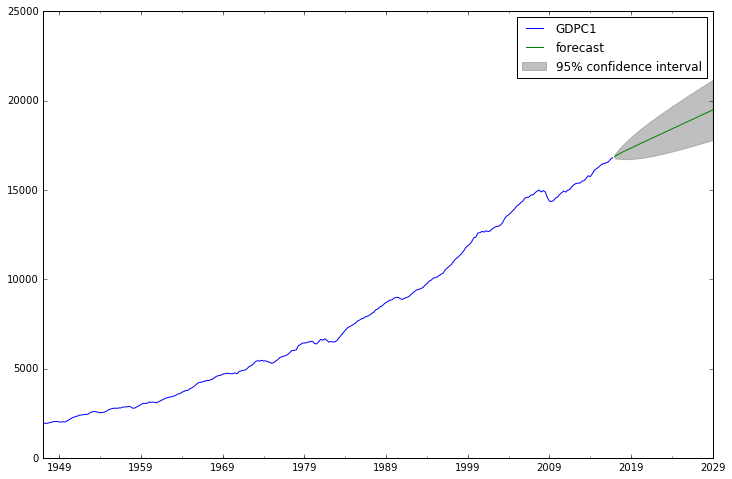

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.plot(ax=ax)
fig = arma_mod20.plot_predict('2017Q1', '2029Q1', dynamic=True, ax=ax, plot_insample=False)
fig.show()

In [24]:
resid = arma_mod20.resid
stats.normaltest(resid)

NormaltestResult(statistic=43.195612589367144, pvalue=4.1705362941733725e-10)

C:\Users\holab\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


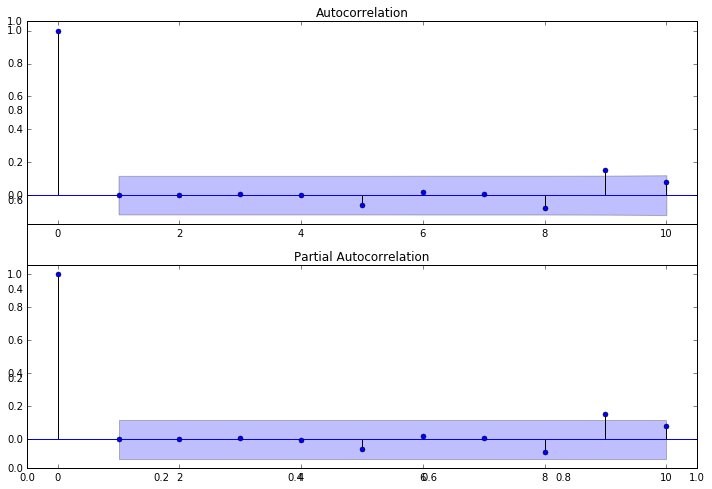

In [28]:
fig, ax= plt.subplots(figsize=(12, 8))
plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=10, ax=ax2)
fig.show()
